<a href="https://colab.research.google.com/github/bouarfachahinez/checkpoints/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
#extract x and y from our data
x=data["Age"].values[:,np.newaxis]
y=data["Salary"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

In [ ]:
#Linear Regression plot
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Salary")
plt.xlabel("Age")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [ ]:
#Multi-Linear Regression plot
#extract x and y from our data
x=data[["Age","Seniority"]]  #we have more than one input
y=data["Salary"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

In [ ]:
# polynmomial
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
# create matrix and vectors
x = [[0.44, 0.68], [0.99, 0.23]]
y = [109.85, 155.72]

lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2)
x_=poly.fit_transform(x)

print("x before transformation: ", x)
print("x after transformation: ", x_)
lg.fit(x_, y) # Fitting Polynomial Regression to the dataset 

x_test=[[0.49, 0.18]]
x_test_=poly.fit_transform(x_test)
lg.predict(x_test_)


_____________________________
x= data[["Age", "Seniority"]]
y= data["Salary"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

#plot
x= data["Age"].values.reshape(-1,1)
y= data["Salary"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("Salary")
plt.xlabel("Age")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

### Example

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error , r2_score
from sklearn import metrics

In [ ]:
data=pd.read_csv("/content/kc_house_data.csv", sep=',')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
def remove_outlier (x) :
  qr1 = np.percentile(data[x],25)
  qr3 = np.percentile(data[x],75)
  iqr = qr3 - qr1 
  cutoff = iqr*1.5
  lower = qr1 - cutoff
  upper = qr3 + cutoff
  return (lower, upper)

In [ ]:
lw, up = remove_outlier("price")
lw1, up1 = remove_outlier("bedrooms")
lw3, up3 = remove_outlier("sqft_lot15")

data = data[(data["price"]>=lw) & (data["price"]<=up)]
data = data[(data["bedrooms"]>=lw1) & (data["bedrooms"]<=up1)]
data = data[(data["sqft_lot15"]>=lw3) & (data["sqft_lot15"]<=up3)]

In [ ]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


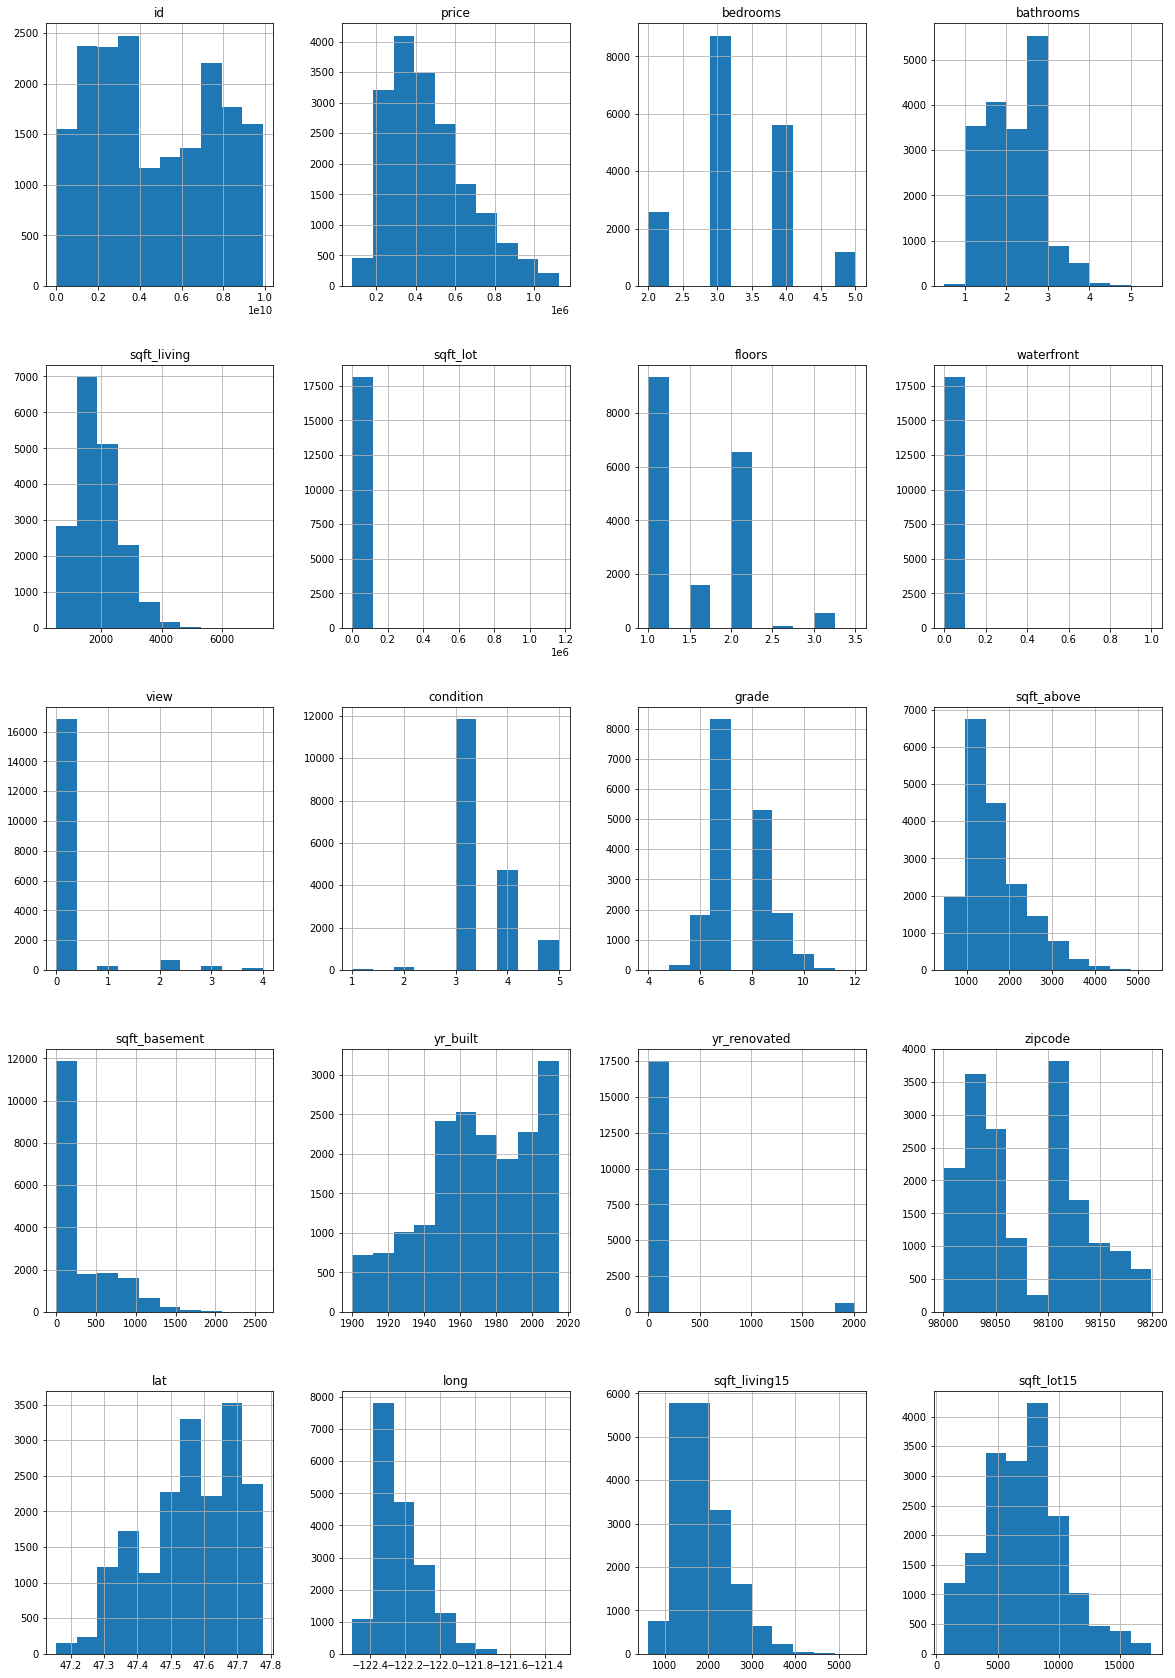

In [ ]:
data.hist(figsize=(20,30))
plt.show()

[Text(0, 0.5, 'Price of the house'), Text(0.5, 0, 'Sqft Living Space')]

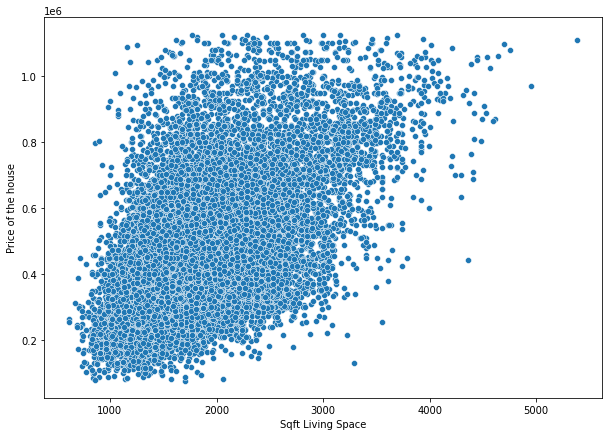

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='sqft_living15', y='price', data=data).set(xlabel='Sqft Living Space', ylabel='Price of the house')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


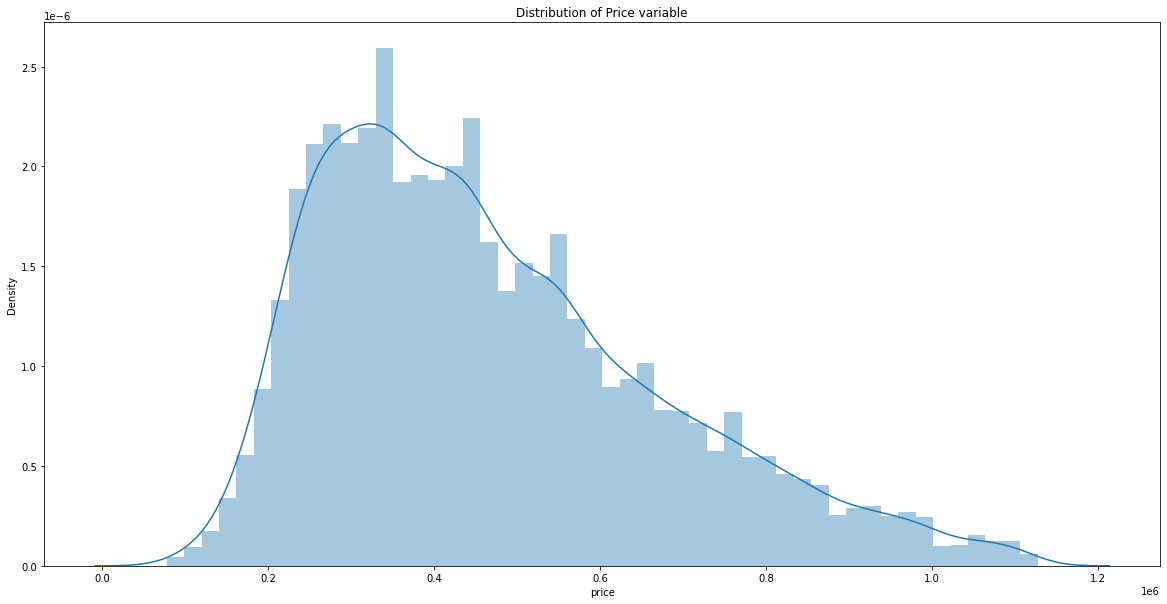

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(data.price, kde=True).set_title('Distribution of Price variable')
plt.show()

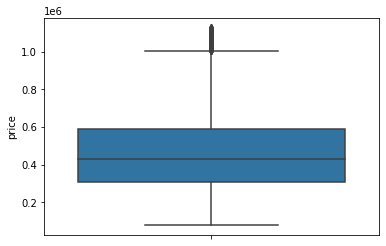

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=data['price']).set_title
plt.show()

In [ ]:
x=data["sqft_living15"].values[:,np.newaxis]
y=data["price"].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=20, random_state=40)

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

print("test Accuracy",lr.score(x_test,y_test))
print("test R squared",r2_score(y_test, pred))
print("test MSE",mean_squared_error(y_test, pred))
print('intercept :',lr.intercept_)
print('coeeficient :',lr.coef_)

test Accuracy 0.28818116939591243
test R squared 0.28818116939591243
test MSE 43043115084.04024
intercept : 115940.85131731955
coeeficient : [187.9196616]


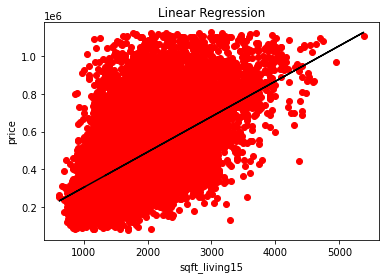

In [ ]:
#Linear Regression plot
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living15")
plt.plot(x,lr.predict(x),color="k")
plt.show()

In [ ]:
x=data[["sqft_living15" ,"grade","bathrooms","bedrooms","view","condition","waterfront","floors"]]
y=data["price"].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=20, random_state=40)

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

print("test Accuracy",lr.score(x_test,y_test))
print("test R squared",r2_score(y_test, pred))
print("test MSE",mean_squared_error(y_test, pred))
print('intercept :',lr.intercept_)
print('coeeficient :',lr.coef_)

test Accuracy 0.5293576920136445
test R squared 0.5293576920136445
test MSE 28459363752.547913
intercept : -596798.281772655
coeeficient : [7.09931401e+01 9.31724951e+04 1.00079824e+04 6.03617306e+03
 4.53377780e+04 5.07892103e+04 1.06690776e+05 9.42641954e+03]


In [ ]:
x2=X = data.drop(['price','id' , 'date'], axis=1)
y=data["price"].values

x_train, x_test, y_train, y_test = train_test_split(x2,y, test_size=20, random_state=40)

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

print("test Accuracy",lr.score(x_test,y_test))
print("test R squared",r2_score(y_test, pred))
print("test MSE",mean_squared_error(y_test, pred))
print('intercept :',lr.intercept_)
print('coeeficient :',lr.coef_)

test Accuracy 0.7711053734296939
test R squared 0.7711053734296939
test MSE 13841074905.566746
intercept : 1114247.4865022884
coeeficient : [-9.56987385e+03  1.91744970e+04  5.43689952e+01  1.73143348e-01
  1.31714366e+04  1.92457068e+05  3.30996312e+04  2.79088469e+04
  7.66218915e+04  3.05141645e+01  2.38548306e+01 -1.88703137e+03
  1.72266778e+01 -2.70861592e+02  5.50310789e+05 -2.09045314e+04
  5.38692707e+01 -7.56889367e+00]


In [ ]:
#poly
x=data[["sqft_living15" ,"grade","bathrooms","bedrooms","view","condition","waterfront","floors"]]
y=data["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
pred = lg.predict(x_test_)

#print("test Accuracy",lr.score(x_test,y_test))
print("test R squared",r2_score(y_test, pred))
print("test MSE",mean_squared_error(y_test, pred))
#print('intercept :',lr.intercept_)
#print('coeeficient :',lr.coef_)

test R squared 0.4840827356698948
test MSE 21430017154.507923


In [ ]:
x3=X = data.drop(['price','id' , 'date'], axis=1)
y=data["price"].values

x_train, x_test, y_train, y_test = train_test_split(x3,y, test_size=20, random_state=40)
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
pred = lg.predict(x_test_)

print("test R squared",r2_score(y_test, pred))
print("test MSE",mean_squared_error(y_test, pred))

test R squared 0.803474609020101
test MSE 11883733131.511822


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x3,y, test_size=20, random_state=40)
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
pred = lg.predict(x_test_)

print("test R squared",r2_score(y_test, pred))
print("test MSE",mean_squared_error(y_test, pred))

test R squared 0.8152440212879848
test MSE 11172046189.641912


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x3,y, test_size=20, random_state=40)
lg=LinearRegression()
poly=PolynomialFeatures(degree=4)

x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
pred = lg.predict(x_test_)

print("test R squared",r2_score(y_test, pred))
print("test MSE",mean_squared_error(y_test, pred))

test R squared 0.8177073971799893
test MSE 11023087820.66365


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=80 ,min_samples_leaf=1 ,min_samples_split=2,random_state=0)
model=regr.fit(x_train,y_train)
pred=regr.predict(x_test)
print("train Accuracy : ",regr.score(x_train,y_train))
print("test Accuracy : ",regr.score(x_test,y_test))
print("test R squared",r2_score(y_test, pred))
print("test MSE",mean_squared_error(y_test, pred))

train Accuracy :  0.9802713237583619
test Accuracy :  0.9151316307711759
test R squared 0.9151316307711759
test MSE 5131922374.982641


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.1, max_depth=4, n_estimators=1000)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
print("train Accuracy : ",xgb.score(x_train,y_train))
print("test Accuracy : ",xgb.score(x_test,y_test))
print("test R squared",r2_score(y_test, pred))
print("test MSE",mean_squared_error(y_test, pred))

[23:50:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train Accuracy :  0.9476401833660796
test Accuracy :  0.9493875016015013
test R squared 0.9493875016015013
test MSE 3060497277.669055


In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, BayesianRidge,RANSACRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor